Source: https://www.practicaldatascience.org/html/exercises/Exercise_plotting_part2.html

# Wealth and Democracy
Let’s now pivot from working with example data to real data. Load the World Development Indicator data you worked with over the summer. This is country-level data that includes information on both countries’ GDP per capita (a measure of wealth) and the Polity IV scores (a measure of how democratic a country is – countries with higher scores are liberal democracies, countries with low scores are autocratic.). Use the code below to download the data.

In [2]:
# Reading using pandas didn't work
!curl -LJO https://raw.githubusercontent.com/nickeubank/practicaldatascience/master/Example_Data/world-small.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4190  100  4190    0     0   3360      0  0:00:01  0:00:01 --:--:--  3357


In [3]:
import pandas as pd
wdi = pd.read_csv('world-small.csv')

In [4]:
wdi.head()

,country,region,gdppcap08,polityIV
0,Albania,C&E Europe,7715,17.8
1,Algeria,Africa,8033,10.0
2,Angola,Africa,5899,8.0
3,Argentina,S. America,14333,18.0
4,Armenia,C&E Europe,6070,15.0


# Exercise 1

Let’s being analyzing this data by estimating a simple linear model (“ordinary least squares”) of the relationship between GDP per capita (gdppcap08) and democracy scores (polityIV). We will do so using the statsmodel package, which we’ll discuss in detail later is this course. For the momement, just use this code:

In [5]:
import statsmodels.formula.api as smf
results = smf.ols('polityIV ~ gdppcap08',
                   data=wdi).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               polityIV   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     6.981
Date:                Sat, 07 Aug 2021   Prob (F-statistic):            0.00915
Time:                        12:01:08   Log-Likelihood:                -475.14
No. Observations:                 145   AIC:                             954.3
Df Residuals:                     143   BIC:                             960.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1354      0.721     16.841      0.0

# Exercise 2
Based on the results of this analysis, what would you conclude about about the relationship between gdppcap08 and polityIV?

(If you aren’t familiar with Linear Models and aren’t sure how to interprete this, you can also just look at the simple correlation between these two variables using wdi[['polityIV', 'gdppcap08']].corr().)

Write down your conclusions.

Small positive correlation

# Exercise 3
Now let’s plot the relationship you just estimated statistically. First, use plotnine to create a scatter plot of polityIV and gdppcap08.

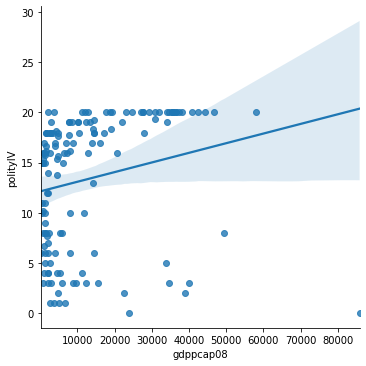

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lmplot(
    data=wdi,
    x='gdppcap08', y='polityIV'
)

# Exercise 4
Now overlay the linear model you just estimated. You can do this by adding a geom_smooth() layer, where the method argument is set to 'lm' (for linear model).

Done before

# Exercise 5
Does it seem like the linear model you estimated fits the data well?
No

# Exercise 6
Linear models impose a very strict functional form on the model they use: they try to draw a straight line through the data, no matter what. Let’s consider a more flexible functional form. Change the method in your geom_smooth to "lowess". This is a form of local polynomial regression that is designed to be flexible in how it fits the data.

<AxesSubplot:xlabel='gdppcap08', ylabel='polityIV'>

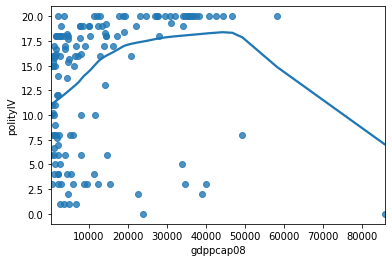

In [9]:
sns.regplot(
    data=wdi,
    x='gdppcap08', y='polityIV', lowess=True
)

# Exercise 7
This does seem to fit the data better, but there’s clearly this HUGE outlier in the bottom right. Who is that? Using geom_text(), label the points on your graph with country names.

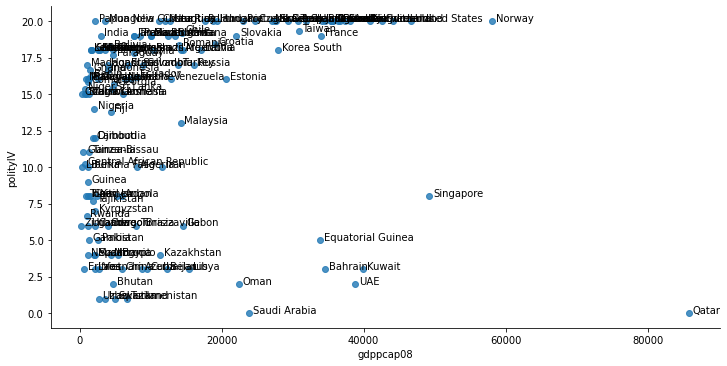

In [16]:
ax = sns.lmplot('gdppcap08', # Horizontal axis
           'polityIV', # Vertical axis
           data=wdi, # Data source
           fit_reg=False, # Don't fix a regression line
           size = 5,
           aspect = 2 ) # size and dimension

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(wdi.gdppcap08 + 500, wdi.polityIV, wdi.country, plt.gca())  

# Exercise 8
Interesting. It seems that there’s are a lot of rich, undemocratic countries that all have something in common: they’re oil-rich, small, Middle Eastern countries.

Let’s see what happens if we exclude the ten countries with the highest per-capita oil production from our data: Qatar, Kuwait, Equatorial Guinea, United Arab Emirates, Norway, Saudi Arabia, Libya, Oman, Gabon, and Angola. (Note this was in 2007, and excludes very small countries!)

What does the relationship between Polity and GDP per capita look like for non-natural resource producers?

In [17]:
countries = 'Qatar, Kuwait, Equatorial Guinea, United Arab Emirates, Norway, Saudi Arabia, Libya, Oman, Gabon, Angola'.split(', ')

In [20]:
cond = wdi.country.isin(countries)
filtered_wdi = wdi[~cond]

<AxesSubplot:xlabel='gdppcap08', ylabel='polityIV'>

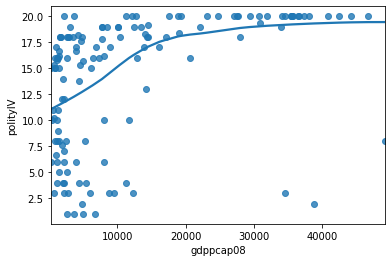

In [21]:
sns.regplot(
    data=filtered_wdi,
    x='gdppcap08', y='polityIV', lowess=True
)

# Exercise 9
Let’s make sure that you accurately identified all 10 of the oil producers. Write a line of code to count up how many big producers you have identified. If you do not get 10, can you figure out what you did wrong?

In [22]:
cond.sum()

9

In [24]:
for country in countries:
    if country not in wdi.country.unique():
        print(country)

United Arab Emirates


In [25]:
wdi.country.unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia', 'Botswana',
       'Brazil', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo Brazzaville', 'Congo Kinshasa',
       'Costa Rica', 'Croatia', 'Cuba', 'Czech Republic', 'Denmark',
       'Djibouti', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea',
       'Eritrea', 'Estonia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan',
       'Kenya', 'Korea South', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia',
       'Lesotho', 'Liberia', '

# Exercise 10
How does the relationship between GDP per capita and Polity look for the oil producers we dropped above?

<AxesSubplot:xlabel='gdppcap08', ylabel='polityIV'>

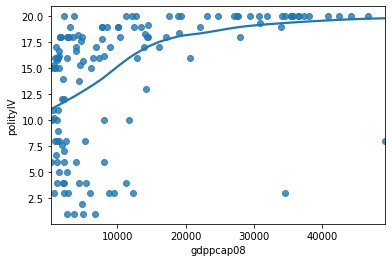

In [26]:
countries = 'Qatar, Kuwait, Equatorial Guinea, UAE, Norway, Saudi Arabia, Libya, Oman, Gabon, Angola'.split(', ')
cond = wdi.country.isin(countries)
filtered_wdi = wdi[~cond]

sns.regplot(
    data=filtered_wdi,
    x='gdppcap08', y='polityIV', lowess=True
)

# Exercise 11
Look back to your answer for Exercise 2. Do you still believe the result of your linear model? What did you learn from plotting. Write down your answers with your partner.

A linear model doesn't seem to be the best approximation to model this data

# Exercise 12
Pick one of your plots and make it look good – label your axes, add a title, try to make the county labels readable.

Are you saying my plots above don't look good?

In [28]:
# %pip install altair

In [54]:
import altair as alt

# Define the degree of the polynomial fits
degree_list = [1, 3]

base = alt.Chart(filtered_wdi).mark_circle(color="black").encode(
    alt.X("gdppcap08"), alt.Y("polityIV"), color='region',
    tooltip=['country', 'region', 'gdppcap08', 'polityIV']
)

polynomial_fit = [
    base.transform_regression(
        "gdppcap08", "polityIV", method="poly", order=order, as_=["gdppcap08", str(order)]
    )
    .mark_line()
    .transform_fold([str(order)], as_=["degree", "polityIV"])
    .encode(alt.Color("degree:N"))
    for order in degree_list
]

alt.layer(base, *polynomial_fit)

alt.LayerChart(...)